In [113]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [114]:
#Gets the coefficents based 
def multiVariateLinearRegression(X,Y):
    XprimeX = np.matmul(X.T,X)
    XprimeX_inv = np.linalg.inv(XprimeX)
    XprimeY = np.matmul(X.T,Y)
    coef = np.matmul(XprimeX_inv,XprimeY)
    
    return coef

In [115]:
#Y prediction values based on Coefficents
def predict_Y(X,coef):
    return np.matmul(X,coef)

In [126]:
def plot_data(X,Y,coef):
    predictedY = predict_Y(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    MSE = metrics.mean_squared_error(Y,predictedY)
    print('SSE: ',SSE)
    print('MSE:',MSE)
    plt.legend()
    plt.show

In [127]:
XandY_weekly = pd.read_csv('X_and_Y_7-Day Lag.csv', dtype = float)

In [122]:
tenp = (6886-3700)/10.0 #Finding 10 percent test of total number of data
print(tenp)
endLoc = int(6886-tenp) #Getting 90 percent test of total number of data
X = (np.array(XandY_weekly.iloc[3700:endLoc,0:20], dtype = float)) #Creating X data matrix 
Y = np.array(XandY_weekly.iloc[3700:endLoc,21]) #Creating Y value data
Y = np.reshape(Y, (Y.size,1))

318.6


In [124]:
coef = multiVariateLinearRegression(X,Y)

('SSE: ', 0.4586691199872903)
('MSE:', 0.00015998225322193593)


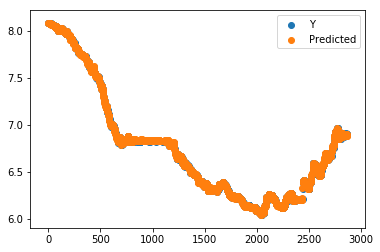

In [129]:
plot_data(X,Y,coef)

In [131]:
X_2 = (np.array(XandY_weekly.iloc[(endLoc):(6886),13:20], dtype = float))
Y_2= np.array(XandY_weekly.iloc[endLoc:(6886),21])
Y_2 = np.reshape(Y_2, (Y_2.size,1))

In [132]:
coef_2 = multiVariateLinearRegression(X_2,Y_2)

('SSE: ', 0.17229356863041964)
('MSE:', 0.0005401052308163625)


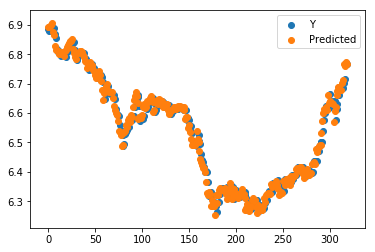

In [134]:
plot_data(X_2,Y_2,coef_2)

In [138]:
X_3 = (np.array(XandY_weekly.iloc[(endLoc):(6886),6:20], dtype = float))
Y_3 = np.array(XandY_weekly.iloc[endLoc:(6886),21])
Y_3= np.reshape(Y_3, (Y_3.size,1))

In [139]:
coef_3 = multiVariateLinearRegression(X_3,Y_3)

('SSE: ', 0.15719471437200774)
('MSE:', 0.0004927733992852908)


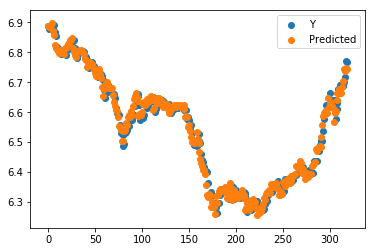

In [140]:
plot_data(X_3,Y_3,coef_3)